<a href="https://colab.research.google.com/github/sdharaskar/DS552/blob/main/DS552_S25_Assignment2_Swapnil_Dharaskar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 - Generative vs. Discriminative Models

# Penguins Dataset

In [ ]:
The Penguins dataset is part of the seaborn library and has data about three penduin species

In [17]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve

RANDOM_STATE=42

In [3]:
# Load the dataset
penguins = sns.load_dataset("penguins")
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
# Filter for two species (e.g., Adelie and Chinstrap)
filtered_penguins = penguins[penguins['species'].isin(['Adelie', 'Chinstrap'])]
filtered_penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
filtered_penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 0 to 219
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            220 non-null    object 
 1   island             220 non-null    object 
 2   bill_length_mm     219 non-null    float64
 3   bill_depth_mm      219 non-null    float64
 4   flipper_length_mm  219 non-null    float64
 5   body_mass_g        219 non-null    float64
 6   sex                214 non-null    object 
dtypes: float64(4), object(3)
memory usage: 13.8+ KB


In [6]:
filtered_penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,219.000000,219.000000,219.000000,219.000000
mean,41.909589,18.369406,191.776256,3710.730594
std,5.477062,1.189914,7.243484,436.250355
min,32.100000,15.500000,172.000000,2700.000000
25%,37.750000,17.500000,187.000000,3400.000000
50%,40.600000,18.400000,191.000000,3700.000000
75%,45.950000,19.100000,196.000000,3987.500000
max,58.000000,21.500000,212.000000,4800.000000


In [8]:
filtered_penguins['species'].unique()

array(['Adelie', 'Chinstrap'], dtype=object)

In [9]:
# Drop rows with missing values
filtered_penguins.dropna(inplace=True)
filtered_penguins.info()


<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 0 to 219
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            214 non-null    object 
 1   island             214 non-null    object 
 2   bill_length_mm     214 non-null    float64
 3   bill_depth_mm      214 non-null    float64
 4   flipper_length_mm  214 non-null    float64
 5   body_mass_g        214 non-null    float64
 6   sex                214 non-null    object 
dtypes: float64(4), object(3)
memory usage: 13.4+ KB


<ipython-input-9-9b5bdc8cfdcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_penguins.dropna(inplace=True)


In [10]:
# Encode species into binary labels (Adelie -> 0, Chinstrap -> 1)
filtered_penguins['species'] = filtered_penguins['species'].map({'Adelie': 0, 'Chinstrap': 1})
filtered_penguins.head()


<ipython-input-10-d261d1519db2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_penguins['species'] = filtered_penguins['species'].map({'Adelie': 0, 'Chinstrap': 1})


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,0,Torgersen,39.5,17.4,186.0,3800.0,Female
2,0,Torgersen,40.3,18.0,195.0,3250.0,Female
4,0,Torgersen,36.7,19.3,193.0,3450.0,Female
5,0,Torgersen,39.3,20.6,190.0,3650.0,Male


We will select onl the numeric features for the model.

In [11]:
# Select features and target
X = filtered_penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = filtered_penguins['species']



LogisticRegression()

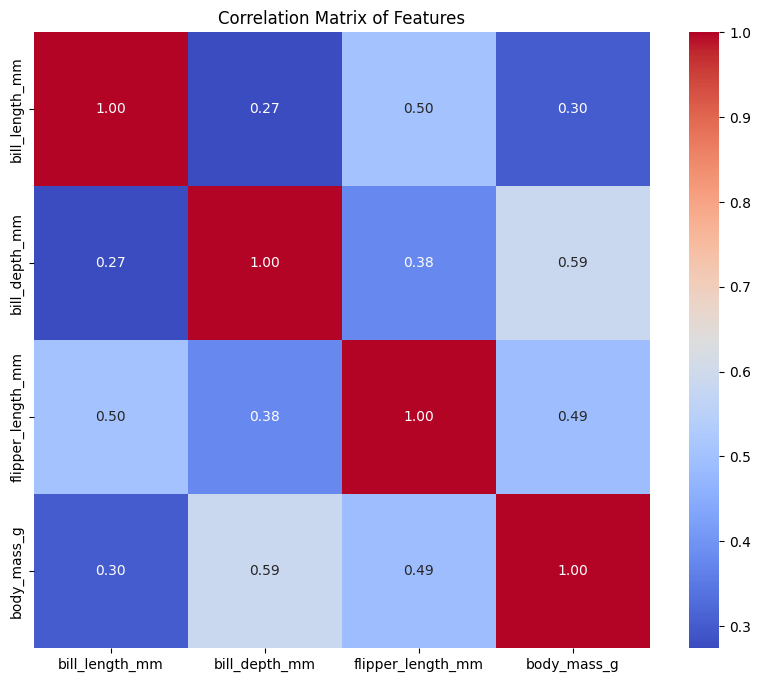

In [26]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix of Features")
plt.show()

# Interpretation guide:
# - Values close to +1 indicate strong positive correlation (as one feature increases, the other also increases).
# - Values close to -1 indicate strong negative correlation (as one feature increases, the other decreases).
# - Values near 0 indicate no or weak linear correlation.
# - Pay attention to highly correlated pairs (|correlation| > 0.8), which may suggest multicollinearity issues for some models.

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

In [12]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [14]:
y_prob = model.predict_proba(X_test)
y_prob

array([[1.13179375e-02, 9.88682063e-01],
       [8.92706622e-03, 9.91072934e-01],
       [9.99132577e-01, 8.67422841e-04],
       [1.59056003e-01, 8.40943997e-01],
       [9.59075610e-01, 4.09243901e-02],
       [8.91231902e-01, 1.08768098e-01],
       [9.41970677e-01, 5.80293228e-02],
       [9.95664360e-01, 4.33564022e-03],
       [9.32867035e-01, 6.71329649e-02],
       [8.06701920e-01, 1.93298080e-01],
       [9.93091784e-02, 9.00690822e-01],
       [9.97235826e-01, 2.76417448e-03],
       [9.30029858e-03, 9.90699701e-01],
       [2.98108901e-01, 7.01891099e-01],
       [9.69932249e-01, 3.00677506e-02],
       [1.21176673e-02, 9.87882333e-01],
       [1.15152272e-01, 8.84847728e-01],
       [9.40556658e-01, 5.94433421e-02],
       [9.73264115e-01, 2.67358852e-02],
       [9.70480552e-02, 9.02951945e-01],
       [8.90966650e-01, 1.09033350e-01],
       [9.74866954e-01, 2.51330456e-02],
       [8.70347335e-03, 9.91296527e-01],
       [9.48900362e-01, 5.10996378e-02],
       [8.345622

In [15]:
y_prob = model.predict_proba(X_test)[:, 1]
y_prob



array([9.88682063e-01, 9.91072934e-01, 8.67422841e-04, 8.40943997e-01,
       4.09243901e-02, 1.08768098e-01, 5.80293228e-02, 4.33564022e-03,
       6.71329649e-02, 1.93298080e-01, 9.00690822e-01, 2.76417448e-03,
       9.90699701e-01, 7.01891099e-01, 3.00677506e-02, 9.87882333e-01,
       8.84847728e-01, 5.94433421e-02, 2.67358852e-02, 9.02951945e-01,
       1.09033350e-01, 2.51330456e-02, 9.91296527e-01, 5.10996378e-02,
       1.65437744e-01, 9.89981817e-01, 1.14743012e-01, 2.04885968e-03,
       1.47549111e-01, 5.08697988e-02, 8.82232671e-01, 9.94395588e-01,
       1.07467976e-02, 4.56084086e-03, 4.11417889e-02, 7.43394779e-02,
       5.84317855e-03, 4.62479793e-02, 7.73419506e-03, 8.62922773e-03,
       3.59772899e-03, 1.11810339e-02, 9.78119860e-01])

In [19]:
# Evaluate the model
print("Accuracy:\n", accuracy_score(y_test, y_pred))

Accuracy:
 1.0


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        14

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

ROC-AUC Score: 1.0


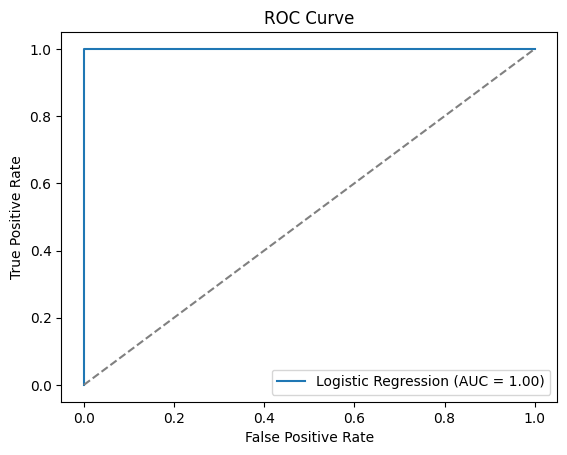

In [18]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


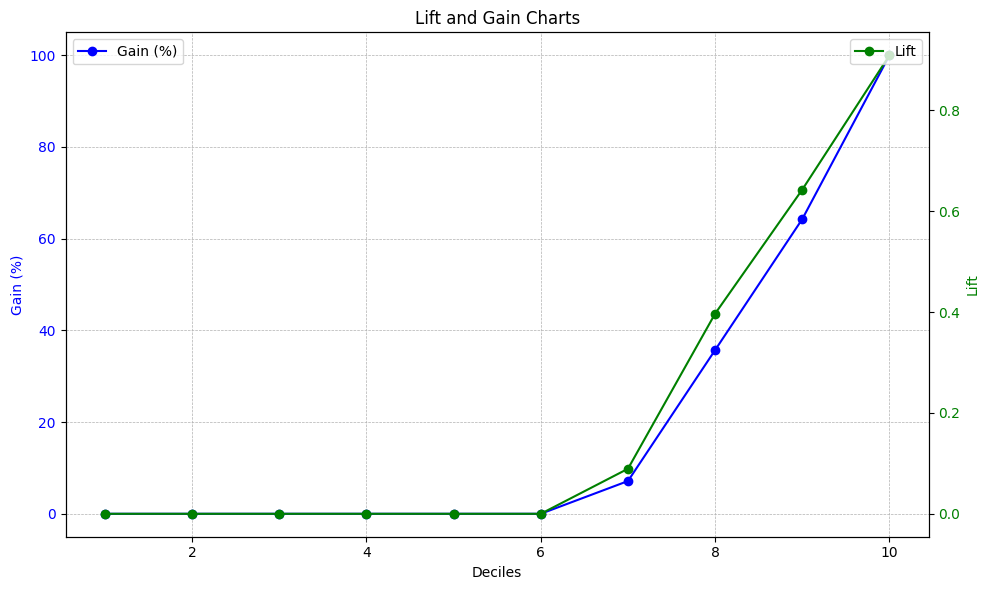

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Function to calculate deciles, lift, and gain
def calculate_lift_gain(y_true, y_prob, n_deciles=10):
    # Create a dataframe with true labels and predicted probabilities
    df = pd.DataFrame({'y_true': y_true, 'y_prob': y_prob})

    # Sort by predicted probabilities in descending order
    df.sort_values('y_prob', ascending=False, inplace=True)

    # Create deciles
    df['decile'] = pd.qcut(df['y_prob'], n_deciles, labels=False, duplicates='drop') + 1  # Deciles from 1 to n_deciles

    # Calculate metrics for each decile
    decile_summary = df.groupby('decile').agg(
        positive_count=('y_true', 'sum'),
        total_count=('y_true', 'count')
    )
    decile_summary['cumulative_positives'] = decile_summary['positive_count'].cumsum()
    decile_summary['cumulative_total'] = decile_summary['total_count'].cumsum()
    decile_summary['gain'] = decile_summary['cumulative_positives'] / df['y_true'].sum()
    decile_summary['lift'] = decile_summary['gain'] / ((decile_summary.index + 1) / n_deciles)

    return decile_summary.reset_index()

# Calculate Lift and Gain for the model
decile_results = calculate_lift_gain(y_test, y_prob, n_deciles=10)

# Prepare data for plotting
deciles = decile_results['decile']
gain = decile_results['gain'] * 100  # Convert to percentage
lift = decile_results['lift']

# Plot Lift and Gain with a dual y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Gain on the primary y-axis
ax1.set_xlabel('Deciles')
ax1.set_ylabel('Gain (%)', color='blue')
ax1.plot(deciles, gain, marker='o', label='Gain (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')  # Add legend for Gain

# Plot Lift on the secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Lift', color='green')
ax2.plot(deciles, lift, marker='o', label='Lift', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')  # Add legend for Lift

# Add grid, title, and legends
plt.title('Lift and Gain Charts(Logistic Regression)')
ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
fig.tight_layout()

# Show the plot
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Load the dataset
penguins = sns.load_dataset("penguins")

# Filter for two species (e.g., Adelie and Chinstrap)
filtered_penguins = penguins[penguins['species'].isin(['Adelie', 'Chinstrap'])]

# Drop rows with missing values
filtered_penguins.dropna(inplace=True)

# Encode species into binary labels (Adelie -> 0, Chinstrap -> 1)
filtered_penguins['species'] = filtered_penguins['species'].map({'Adelie': 0, 'Chinstrap': 1})

# Select features and target
X = filtered_penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = filtered_penguins['species']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [23]:
# Evaluate the model
print("Accuracy Score:\n", accuracy_score(y_test, y_pred))

Accuracy Score:
 0.9534883720930233


ROC-AUC Score: 0.9753694581280788


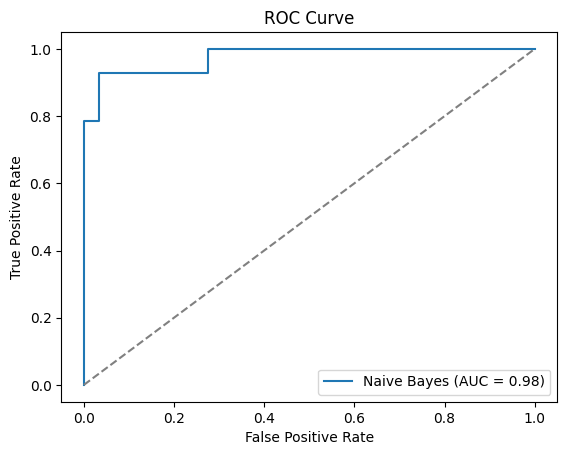

In [24]:
# Evaluate the model
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Naive Bayes (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-22-8785520443f2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_penguins.dropna(inplace=True)
<ipython-input-22-8785520443f2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_penguins['species'] = filtered_penguins['species'].map({'Adelie': 0, 'Chinstrap': 1})


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.93      0.93      0.93        14

    accuracy                           0.95        43
   macro avg       0.95      0.95      0.95        43
weighted avg       0.95      0.95      0.95        43

ROC-AUC Score: 0.9753694581280788


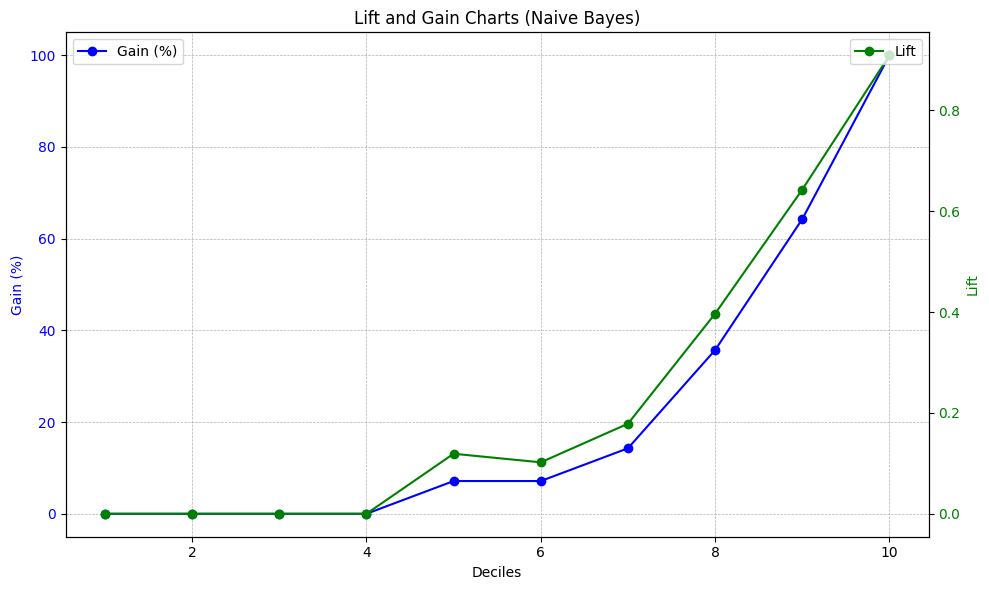

In [22]:
# Evaluate the model

# Function to calculate deciles, lift, and gain
def calculate_lift_gain(y_true, y_prob, n_deciles=10):
    # Create a dataframe with true labels and predicted probabilities
    df = pd.DataFrame({'y_true': y_true, 'y_prob': y_prob})

    # Sort by predicted probabilities in descending order
    df.sort_values('y_prob', ascending=False, inplace=True)

    # Create deciles
    df['decile'] = pd.qcut(df['y_prob'], n_deciles, labels=False, duplicates='drop') + 1  # Deciles from 1 to n_deciles

    # Calculate metrics for each decile
    decile_summary = df.groupby('decile').agg(
        positive_count=('y_true', 'sum'),
        total_count=('y_true', 'count')
    )
    decile_summary['cumulative_positives'] = decile_summary['positive_count'].cumsum()
    decile_summary['cumulative_total'] = decile_summary['total_count'].cumsum()
    decile_summary['gain'] = decile_summary['cumulative_positives'] / df['y_true'].sum()
    decile_summary['lift'] = decile_summary['gain'] / ((decile_summary.index + 1) / n_deciles)

    return decile_summary.reset_index()

# Calculate Lift and Gain for the model
decile_results = calculate_lift_gain(y_test, y_prob, n_deciles=10)

# Prepare data for plotting
deciles = decile_results['decile']
gain = decile_results['gain'] * 100  # Convert to percentage
lift = decile_results['lift']

# Plot Lift and Gain with a dual y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Gain on the primary y-axis
ax1.set_xlabel('Deciles')
ax1.set_ylabel('Gain (%)', color='blue')
ax1.plot(deciles, gain, marker='o', label='Gain (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')  # Add legend for Gain

# Plot Lift on the secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Lift', color='green')
ax2.plot(deciles, lift, marker='o', label='Lift', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')  # Add legend for Lift

# Add grid, title, and layout adjustments
plt.title('Lift and Gain Charts (Naive Bayes)')
ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
fig.tight_layout()

# Show the plot
plt.show()




1.   **Accuracy Comparison:**   
     Accuracy is the ratio of correctly classified samples to the total samples. The accuracy of the logistic regression model is better **1 vs 0.95** for Naive Bayes model. Thus logistic regression does a better job at classifying the penguins.
2.   **AUC comparison:**    
     AUC mesaures how well the model separates positve and negative classes. A higher AUC indicates better discrimination. The AUC of the logistic regression is higher **1 vs. 0.975** for Naive Bayes model.Thus logistic regression has a better ability to rank predictions correctly.
3.   **Lift and Gain charts:**   
     **Lift:** Measures how much better the model performs compared to random chance in identifying positives within each decile.  
     **Gain:** Measures the cumulative proportion of true positives identified up to a given decile.  
     **Decile:** A decile in the context of lift and gain charts is one of the ten equal parts into which the ranked predictions (usually based on predicted probabilities) are divided. Deciles help in analyzing the performance of a model by breaking down predictions into segments of 10% each, ranked by their predicted probabilities.  
     **Naive Bayes achieves higher lift in the early deciles** and consistently identifies positives across the deciles. Thus nieve bayes does better compared to logistic regression in terms of ranking the high probability positives effectively. **Naive Bayes outperforms Logistic Regression on Lift and Gain curves**, especially in earlier deciles where high-ranking predictions matter most.
4.   **Model Performance Comparison:**
     Logistic Regression outperforms Naive Bayes in accuracy and AUC. Logistic Regression does not perform as well as Naive Bayes in terms of the Gain and Lift curve, however for the current dataset this is not a critical metric. Hence we concclude that **Logictic Regression does better job at classifying the Penguin species compared to Naive Bayes.** This could be because of higher correlation between the input features as evident from the correlation matrix.
     





In [ ]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix of Features")
plt.show()

# Interpretation guide:
# - Values close to +1 indicate strong positive correlation (as one feature increases, the other also increases).
# - Values close to -1 indicate strong negative correlation (as one feature increases, the other decreases).
# - Values near 0 indicate no or weak linear correlation.
# - Pay attention to highly correlated pairs (|correlation| > 0.8), which may suggest multicollinearity issues for some models.

# MNIST Dataset

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist.data, mnist.target.astype(int)

In [3]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y.head()

,class
0,5
1,0
2,4
3,1
4,9


In [13]:
# Filter for binary classification (e.g., digits 0 and 1)
#binary_filter = (y == 0) | (y == 1)
#X_binary, y_binary = X[binary_filter], y[binary_filter]

# Normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression
logistic_model = LogisticRegression(multi_class='ovr', max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_y_pred = logistic_model.predict(X_test)
logistic_y_prob = logistic_model.predict_proba(X_test)

# Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
nb_y_pred = naive_bayes_model.predict(X_test)
nb_y_prob = naive_bayes_model.predict_proba(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [14]:
logistic_y_pred[1:10]

array([3, 1, 1, 2, 5, 9, 3, 8, 1])

In [15]:
nb_y_pred[1:10]

array([9, 1, 1, 2, 8, 9, 3, 8, 1])

In [16]:
y_test[1:10]

,class
42024,3
9693,1
36451,1
76,2
68652,5
57258,9
37078,8
42218,8
46416,1


In [18]:
# Evaluate models
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
logistic_auc = roc_auc_score(y_test, logistic_y_prob, multi_class="ovr")
naive_bayes_accuracy = accuracy_score(y_test, nb_y_pred)
naive_bayes_auc = roc_auc_score(y_test, nb_y_prob, multi_class="ovr")



# Summarize metrics
results = {
    "Metric": ["Accuracy", "AUC"],
    "Logistic Regression": [logistic_accuracy, logistic_auc],
    "Naive Bayes": [naive_bayes_accuracy, naive_bayes_auc]
}
results_df = pd.DataFrame(results)

print(results_df)




     Metric  Logistic Regression  Naive Bayes
0  Accuracy             0.917429     0.553571
1       AUC             0.989627     0.927984


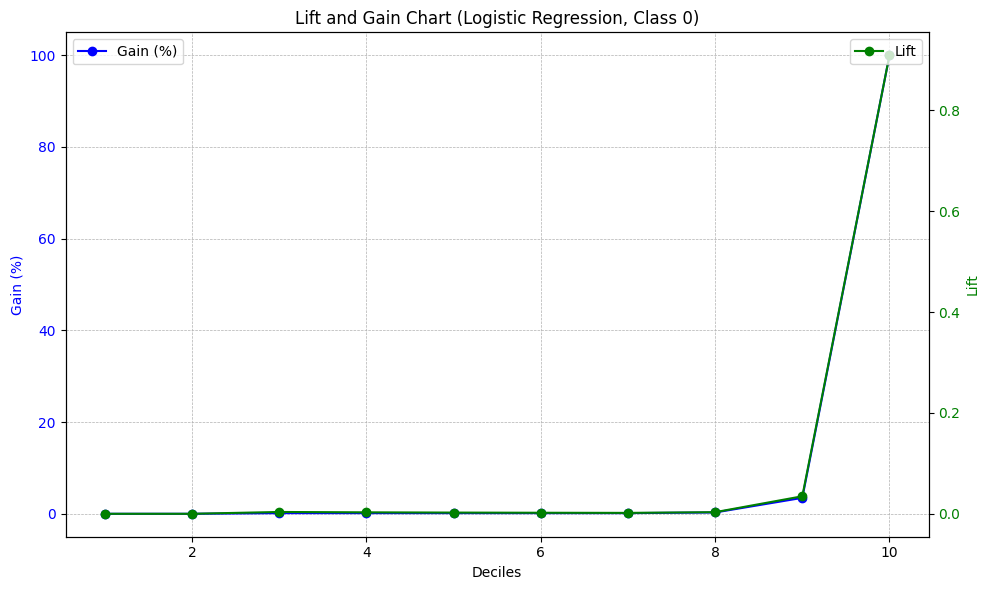

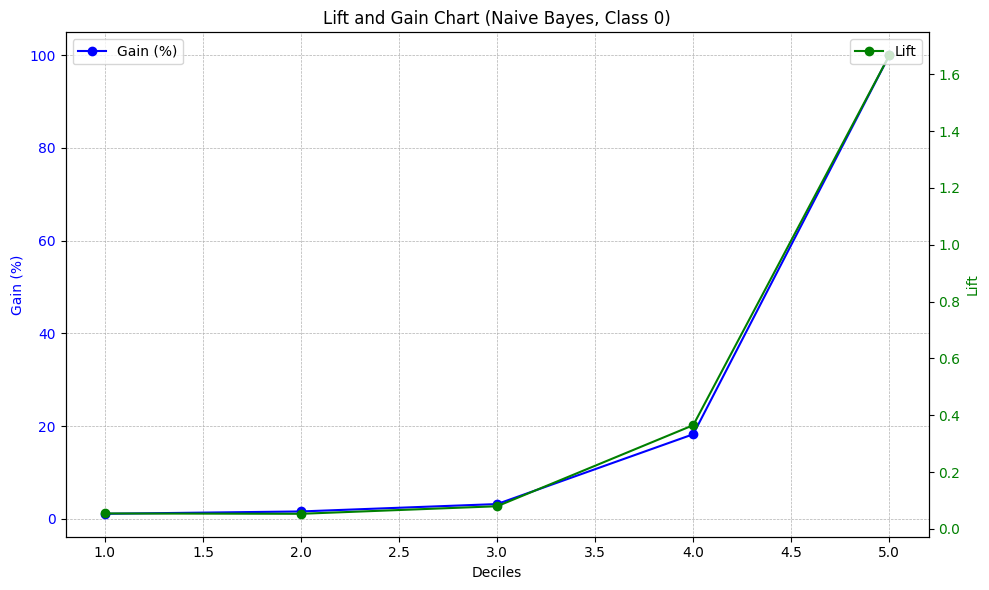

In [19]:
import matplotlib.pyplot as plt

# Function to calculate Lift and Gain for multi-class classification (per class)
def calculate_lift_gain_multiclass(y_true, y_prob, class_label, n_deciles=10):
    # Extract probabilities for the specific class
    y_prob_class = y_prob[:, class_label]

    # Create a dataframe with true labels and probabilities for the class
    df = pd.DataFrame({'y_true': (y_true == class_label).astype(int), 'y_prob': y_prob_class})

    # Sort by predicted probabilities in descending order
    df.sort_values('y_prob', ascending=False, inplace=True)

    # Create deciles
    df['decile'] = pd.qcut(df['y_prob'], n_deciles, labels=False, duplicates='drop') + 1

    # Calculate metrics for each decile
    decile_summary = df.groupby('decile').agg(
        positive_count=('y_true', 'sum'),
        total_count=('y_true', 'count')
    )
    decile_summary['cumulative_positives'] = decile_summary['positive_count'].cumsum()
    decile_summary['cumulative_total'] = decile_summary['total_count'].cumsum()
    decile_summary['gain'] = decile_summary['cumulative_positives'] / df['y_true'].sum()
    decile_summary['lift'] = decile_summary['gain'] / ((decile_summary.index + 1) / n_deciles)

    return decile_summary.reset_index()

# Plot Lift and Gain for a specific class
def plot_lift_gain(decile_summary, model_name, class_label):
    deciles = decile_summary['decile']
    gain = decile_summary['gain'] * 100  # Convert to percentage
    lift = decile_summary['lift']

    # Plot Lift and Gain with a dual y-axis
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot Gain on the primary y-axis
    ax1.set_xlabel('Deciles')
    ax1.set_ylabel('Gain (%)', color='blue')
    ax1.plot(deciles, gain, marker='o', label='Gain (%)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.legend(loc='upper left')

    # Plot Lift on the secondary y-axis
    ax2 = ax1.twinx()
    ax2.set_ylabel('Lift', color='green')
    ax2.plot(deciles, lift, marker='o', label='Lift', color='green')
    ax2.tick_params(axis='y', labelcolor='green')
    ax2.legend(loc='upper right')

    # Add grid, title, and layout adjustments
    plt.title(f'Lift and Gain Chart ({model_name}, Class {class_label})')
    ax1.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
    fig.tight_layout()

    # Show the plot
    plt.show()

# Calculate and plot Lift/Gain for each model for a specific class (e.g., class 0)
class_label = 0  # Change this to any class label you want to analyze

# Logistic Regression Lift and Gain
logistic_lift_gain = calculate_lift_gain_multiclass(y_test, logistic_y_prob, class_label)
plot_lift_gain(logistic_lift_gain, "Logistic Regression", class_label)

# Naive Bayes Lift and Gain
naive_bayes_lift_gain = calculate_lift_gain_multiclass(y_test, nb_y_prob, class_label)
plot_lift_gain(naive_bayes_lift_gain, "Naive Bayes", class_label)




5.   Thus the performance of the models does not seem to differ much between the two datasets. **Logistic Regression still outperforms Naive Bayes for Accuracy and AUC**.


